# Data Bootcamp Final Project: Predicting whether your flight will be delayed?

## Introduction

### One of the many hassles we face while traveling by air are flight delays and being unprepared for them.  In the following notebook and visualizations, I will attempt to answer the following:


##### What are the contributing factors that lead to flight delays?
##### What day of the week do flight delays usually happen more?
##### What airline has a higher average delay?
##### What airports are these delays most common at?

## Notes:

### Dataset uses numeric representation of hours in a day
### Week starting is Monday, week ending is Sunday

# Importing Dependencies and Familiarizing with Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc

import os
import time
import sys

C:\Users\jburr\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Importing Flight Dataset along with Airlines and Airports

In [2]:
flight_data = pd.read_csv('Resources/flights.csv')

C:\Users\jburr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
airlines = pd.read_csv('Resources/airlines.csv')
airports = pd.read_csv('Resources/airports.csv')

### Merging datasets

In [4]:
flight_data_merged = pd.merge(flight_data, airlines, left_on='AIRLINE', right_on='IATA_CODE', how='left')
flight_data_merged.drop('IATA_CODE', axis=1, inplace=True)

In [5]:
flight_data_merged.rename(columns={'AIRLINE_x': 'AIRLINE_CODE','AIRLINE_y': 'AIRLINE'}, inplace=True)

### Exploring Merged dataset 

In [6]:
flight_data_merged.shape

(5819079, 32)

In [7]:
flight_data_merged.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US Airways Inc.
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.


In [8]:
flight_data_merged.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE_CODE            object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
AIRLINE                 object
dtype: o

In [9]:
Total_Airlines = len(flight_data_merged["AIRLINE"].unique())
Total_Days = len(flight_data_merged["DAY_OF_WEEK"].unique())
Total_Airports = len(flight_data_merged["ORIGIN_AIRPORT"].unique())

In [10]:
Total_Airlines

14

In [11]:
Total_Days

7

In [12]:
Total_Airports

930

In [ ]:
# flight_data_merged[flight_data_merged.index % 10 == 0].head(20)

# Data Cleansing

### The below columns are not needed for Machine Learning

In [13]:
del flight_data_merged["CANCELLATION_REASON"]

In [14]:
del flight_data_merged["AIR_SYSTEM_DELAY"]

In [15]:
del flight_data_merged["SECURITY_DELAY"]

In [16]:
del flight_data_merged["AIRLINE_DELAY"]

In [17]:
del flight_data_merged["LATE_AIRCRAFT_DELAY"]

In [18]:
del flight_data_merged["WEATHER_DELAY"]

In [19]:
del flight_data_merged["FLIGHT_NUMBER"]

In [20]:
del flight_data_merged["YEAR"]

In [21]:
del flight_data_merged["TAIL_NUMBER"]

In [22]:
del flight_data_merged["WHEELS_ON"]

In [23]:
del flight_data_merged["TAXI_IN"]

In [24]:
del flight_data_merged["ELAPSED_TIME"]

In [25]:
del flight_data_merged["DIVERTED"]

In [26]:
del flight_data_merged["WHEELS_OFF"]

In [27]:
del flight_data_merged["TAXI_OUT"]

In [28]:
del flight_data_merged["DISTANCE"]

In [29]:
flight_data_merged.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,AIR_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,AIRLINE
0,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,205.0,169.0,430,408.0,-22.0,0,Alaska Airlines Inc.
1,1,1,4,AA,LAX,PBI,10,2.0,-8.0,280.0,263.0,750,741.0,-9.0,0,American Airlines Inc.
2,1,1,4,US,SFO,CLT,20,18.0,-2.0,286.0,266.0,806,811.0,5.0,0,US Airways Inc.
3,1,1,4,AA,LAX,MIA,20,15.0,-5.0,285.0,258.0,805,756.0,-9.0,0,American Airlines Inc.
4,1,1,4,AS,SEA,ANC,25,24.0,-1.0,235.0,199.0,320,259.0,-21.0,0,Alaska Airlines Inc.


In [30]:
flight_data_merged.dtypes.reset_index()

,index,0
0,MONTH,int64
1,DAY,int64
2,DAY_OF_WEEK,int64
3,AIRLINE_CODE,object
4,ORIGIN_AIRPORT,object
5,DESTINATION_AIRPORT,object
6,SCHEDULED_DEPARTURE,int64
7,DEPARTURE_TIME,float64
8,DEPARTURE_DELAY,float64
9,SCHEDULED_TIME,float64


In [31]:
flight_data_merged.dtypes

MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE_CODE            object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
SCHEDULED_TIME         float64
AIR_TIME               float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
CANCELLED                int64
AIRLINE                 object
dtype: object

In [35]:
for col in obj_cols:
    print(col, len(flight_data_merged.loc[flight_data_merged[col].isna()]))

AIRLINE 0
DAY_OF_WEEK 0
ORIGIN_AIRPORT 0
DESTINATION_AIRPORT 0


In [36]:
for col in numeric_cols:
    print(col, len(flight_data_merged.loc[flight_data_merged[col].isna()]))


MONTH 0
SCHEDULED_DEPARTURE 0
DEPARTURE_TIME 86153
DEPARTURE_DELAY 86153
ARRIVAL_TIME 92513
ARRIVAL_DELAY 105071
AIR_TIME 105071


In [37]:
flight_data_merged.DEPARTURE_DELAY.describe()

count    5.732926e+06
mean     9.370158e+00
std      3.708094e+01
min     -8.200000e+01
25%     -5.000000e+00
50%     -2.000000e+00
75%      7.000000e+00
max      1.988000e+03
Name: DEPARTURE_DELAY, dtype: float64

In [38]:
flight_data_merged.shape

(5819079, 16)

In [39]:
flight_data_merged.groupby("DAY_OF_WEEK").mean()["DEPARTURE_DELAY"]

DAY_OF_WEEK
1    10.871775
2     9.164522
3     8.645277
4     9.956913
5     9.429768
6     7.827416
7     9.402856
Name: DEPARTURE_DELAY, dtype: float64

In [40]:
flight_data_merged.DAY_OF_WEEK.value_counts()

4    872521
1    865543
5    862209
3    855897
2    844600
7    817764
6    700545
Name: DAY_OF_WEEK, dtype: int64

In [41]:
flight_data_merged.DAY_OF_WEEK.value_counts() / len(flight_data_merged)

4    0.149941
1    0.148742
5    0.148169
3    0.147085
2    0.145143
7    0.140532
6    0.120388
Name: DAY_OF_WEEK, dtype: float64

In [42]:
flight_data_merged = flight_data_merged.loc[-(flight_data_merged.DEPARTURE_DELAY.isna())]

In [43]:
flight_data_merged.shape

(5732926, 16)

In [44]:
flight_data_merged.describe()

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,AIR_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED
count,5.732926e+06,5.732926e+06,5.732926e+06,5.732926e+06,5.732926e+06,5.732926e+06,5.732920e+06,5.714008e+06,5.732926e+06,5.726566e+06,5.714008e+06,5.732926e+06
mean,6.547211e+00,1.570853e+01,3.932391e+00,1.328964e+03,1.335204e+03,9.370158e+00,1.419380e+02,1.135116e+02,1.493374e+03,1.476491e+03,4.407057e+00,6.508021e-04
std,3.397111e+00,8.774777e+00,1.986192e+00,4.834728e+02,4.964233e+02,3.708094e+01,7.533436e+01,7.223082e+01,5.068423e+02,5.263197e+02,3.927130e+01,2.550252e-02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.800000e+01,7.000000e+00,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00
25%,4.000000e+00,8.000000e+00,2.000000e+00,9.160000e+02,9.210000e+02,-5.000000e+00,8.600000e+01,6.000000e+01,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00
50%,7.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.330000e+03,-2.000000e+00,1.230000e+02,9.400000e+01,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.730000e+03,1.740000e+03,7.000000e+00,1.740000e+02,1.440000e+02,1.917000e+03,1.917000e+03,8.000000e+00,0.000000e+00
max,1.200000e+01,3.100000e+01,7.000000e+00,2.359000e+03,2.400000e+03,1.988000e+03,7.180000e+02,6.900000e+02,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00


In [45]:
flight_data_merged = flight_data_merged.loc[-(flight_data_merged.ARRIVAL_DELAY.isna())]

# Visualization

In [47]:
flight_data_merged.dtypes

MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE_CODE            object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
SCHEDULED_TIME         float64
AIR_TIME               float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
CANCELLED                int64
AIRLINE                 object
WEEK_DAY                object
dtype: object

In [48]:
flight_data_merged.DEPARTURE_DELAY.value_counts()

-3.0       454411
-4.0       443050
-5.0       437906
-2.0       434202
-1.0       386513
 0.0       328442
-6.0       323543
-7.0       242377
-8.0       173023
 1.0       159619
-9.0       121937
 2.0       121080
 3.0       104177
-10.0      103772
 4.0        92813
 5.0        84448
 6.0        75809
 7.0        68232
 8.0        63199
 9.0        58894
 10.0       54961
 11.0       50023
-11.0       49526
 12.0       46925
 13.0       43543
 14.0       40904
 15.0       38835
 16.0       35771
 17.0       33964
-12.0       33076
            ...  
 1004.0         1
 1061.0         1
 790.0          1
 789.0          1
 1007.0         1
 1009.0         1
 1012.0         1
 779.0          1
 1013.0         1
 1014.0         1
 775.0          1
 1018.0         1
 1021.0         1
-46.0           1
 1024.0         1
 1029.0         1
 1036.0         1
 750.0          1
 1041.0         1
 1042.0         1
 1045.0         1
 743.0          1
 1047.0         1
 741.0          1
 731.0    

### Due to resource constraints, I Developed this model on a sample of the overall data

In [49]:
flight_data_merged_res = flight_data_merged.sample(n=500000)

In [50]:
flight_data_merged_res.shape

(500000, 17)

In [51]:
del flight_data_merged["CANCELLED"]

#### No missing values

In [52]:
# changing Day of Week to Week Day to not overwrite any data
flight_data_merged_res["WEEK_DAY"] = flight_data_merged_res["DAY_OF_WEEK"].astype(str)

In [53]:
# create a binary indicator that sipsp exists
flight_data_merged_res["bin_departure_delay"] = flight_data_merged_res.apply(lambda r: 1 if r.DEPARTURE_DELAY > 0 else 0, axis=1)

In [54]:
flight_data_merged_res.shape

(500000, 18)

### Data Visualization

In [33]:
obj_cols = [
    "AIRLINE",
    "DAY_OF_WEEK",
    "ORIGIN_AIRPORT",
    "DESTINATION_AIRPORT",
    ]

In [34]:
numeric_cols = [
    "MONTH",
    "SCHEDULED_DEPARTURE",
    "DEPARTURE_TIME",
    "DEPARTURE_DELAY",
    "ARRIVAL_TIME",
    "ARRIVAL_DELAY",
    "AIR_TIME"
]

In [55]:
for col in obj_cols:
    print(col, len(flight_data_merged_res.loc[flight_data_merged_res[col].isna()]))

AIRLINE 0
DAY_OF_WEEK 0
ORIGIN_AIRPORT 0
DESTINATION_AIRPORT 0


In [56]:
for col in numeric_cols:
    print(col, len(flight_data_merged_res.loc[flight_data_merged_res[col].isna()]))

MONTH 0
SCHEDULED_DEPARTURE 0
DEPARTURE_TIME 0
DEPARTURE_DELAY 0
ARRIVAL_TIME 0
ARRIVAL_DELAY 0
AIR_TIME 0


C:\Users\jburr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


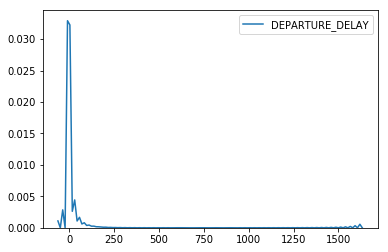

In [57]:
sns.kdeplot(flight_data_merged_res.DEPARTURE_DELAY)

C:\Users\jburr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


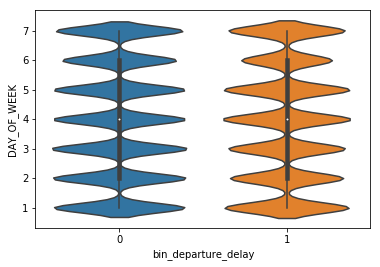

In [58]:
sns.violinplot(x="bin_departure_delay", y="DAY_OF_WEEK", data=flight_data_merged_res)

Text(0.5,1,'Delay by Day of Week')

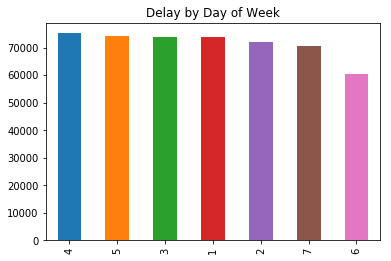

In [59]:
flight_data_merged_res.WEEK_DAY.value_counts().plot(kind="bar")
plt.title("Delay by Day of Week")

C:\Users\jburr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


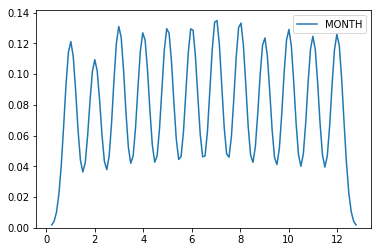

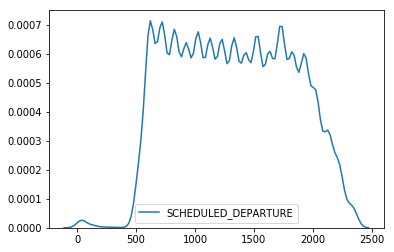

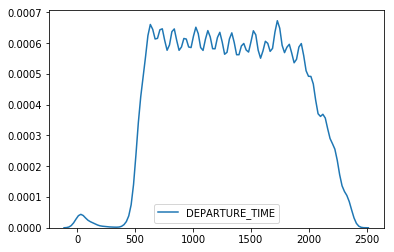

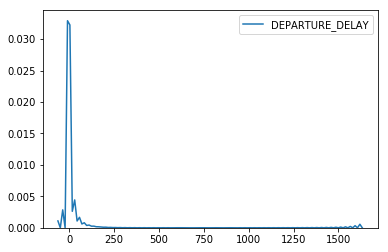

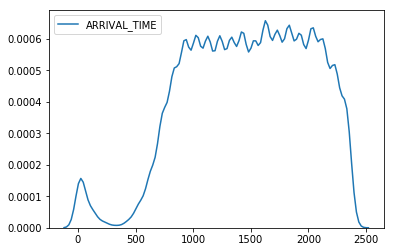

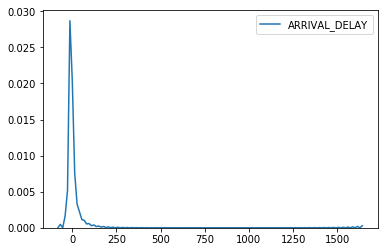

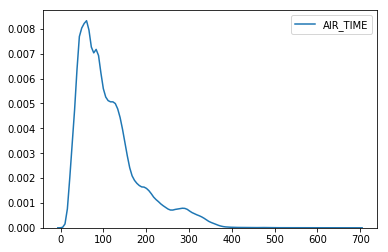

In [60]:
for col in numeric_cols:
    sns.kdeplot(flight_data_merged_res[col])
    plt.show()

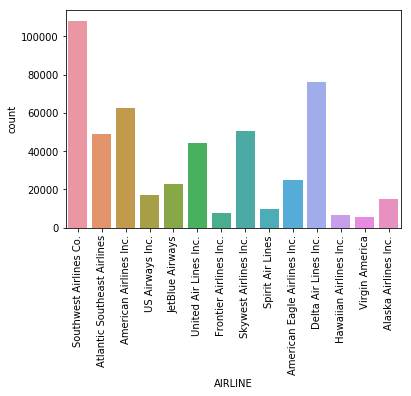

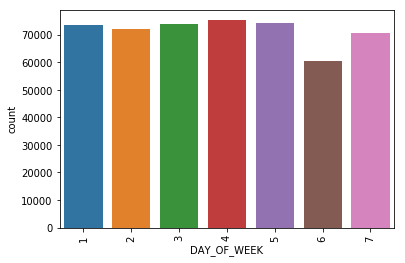

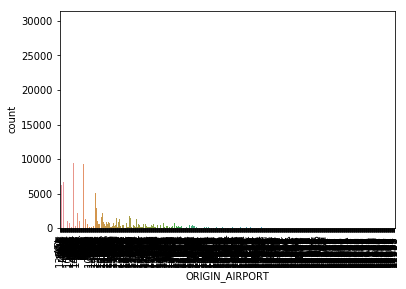

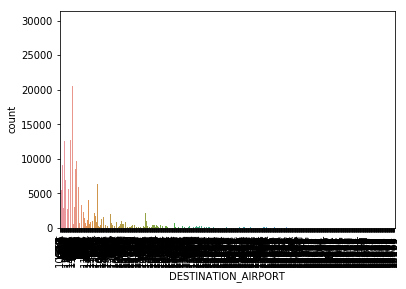

In [61]:
for col in obj_cols:
    sns.countplot(col, data=flight_data_merged_res)
    plt.xticks(rotation=90)
    plt.show()

C:\Users\jburr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


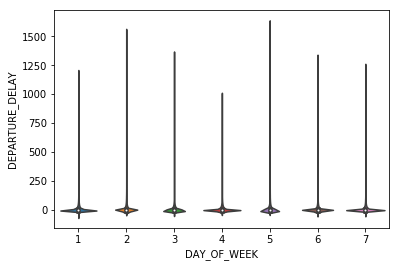

In [62]:
sns.violinplot(x="DAY_OF_WEEK", y="DEPARTURE_DELAY", data=flight_data_merged_res, fit_reg=False, y_jitter=0.1)

In [63]:
def makeUniPlot(xinput):
    sns.regplot(x=xinput, y="DEPARTURE_DELAY", data=flight_data_merged_res, fit_reg=False, y_jitter=0.1, x_jitter=0.1, scatter_kws={"alpha": 0.2})
    plt.show()

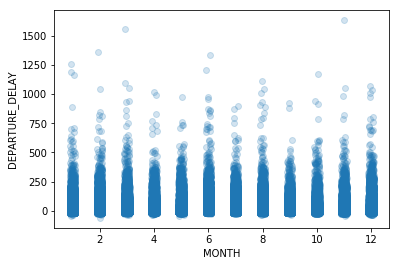

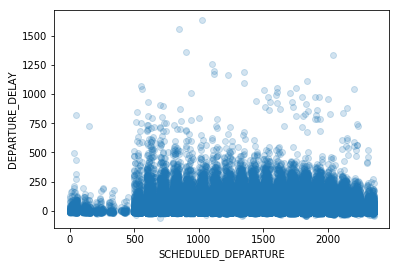

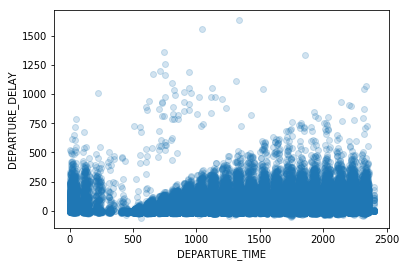

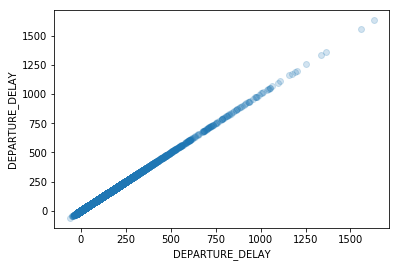

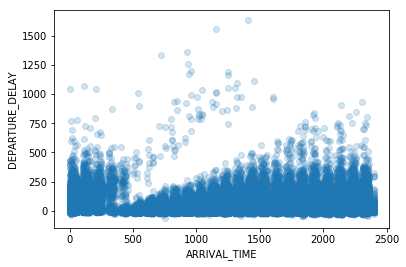

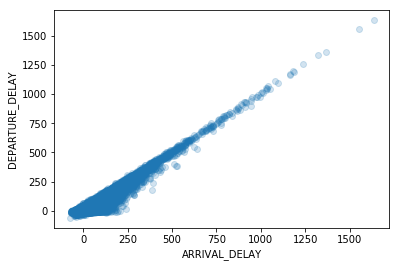

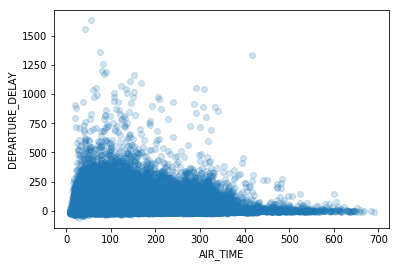

In [64]:
for col in numeric_cols:
    makeUniPlot(col)

C:\Users\jburr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


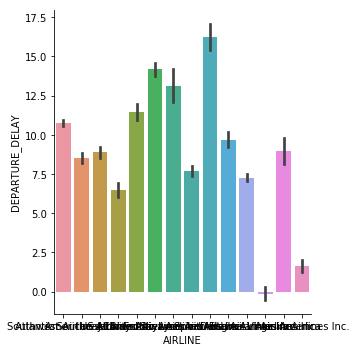

In [65]:
sns.catplot(x="AIRLINE", y="DEPARTURE_DELAY", data=flight_data_merged_res, kind="bar")

# fig, ax = plt.subplots()
# ax.set_xticks(range(len(flight_data_merged_res)))
# ax.set_xticklabels(lam_beta, rotation='vertical')

C:\Users\jburr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


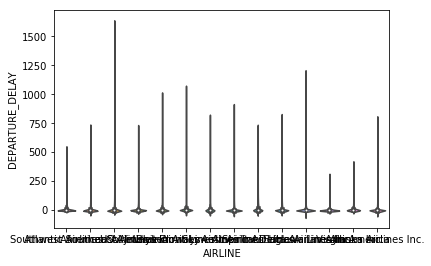

In [66]:
sns.violinplot(x="AIRLINE", y="DEPARTURE_DELAY", data=flight_data_merged_res)

C:\Users\jburr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


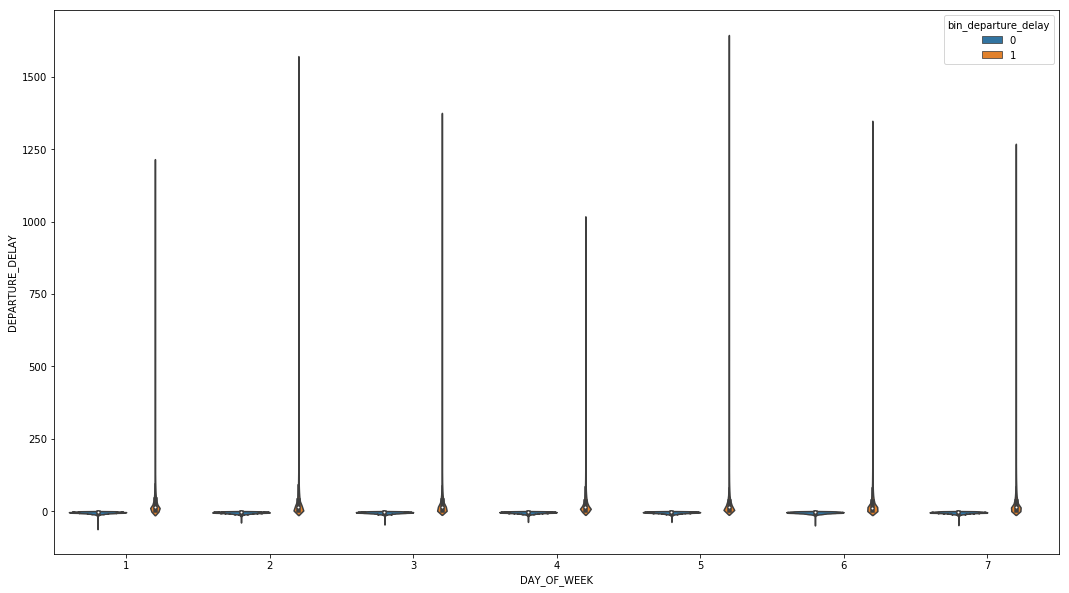

In [67]:
plt.figure(figsize=(18,10))
sns.violinplot(x="DAY_OF_WEEK", y="DEPARTURE_DELAY", data=flight_data_merged_res, hue="bin_departure_delay")

# Feature Importance 

In [68]:
flight_data_merged.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE_CODE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'AIR_TIME', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'AIRLINE', 'WEEK_DAY'],
      dtype='object')

In [69]:
plt.style.use("seaborn")

In [70]:
features_to_use = [
    "AIRLINE",
    "WEEK_DAY",
    "SCHEDULED_DEPARTURE",
#     "DEPARTURE_TIME"
    "AIR_TIME"
]

In [ ]:
X = flight_data_merged_res[features_to_use]

In [ ]:
y = flight_data_merged_res[["bin_departure_delay"]]

In [ ]:
X.head()

In [ ]:
y.head()

# Model Selection and Importance

In [ ]:
X_encoded = pd.get_dummies(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
y_train.shape, y_test.shape

In [ ]:
X_train.head()

In [ ]:
# normalize
sds = StandardScaler()
sds.fit(X_train)
X_train = sds.transform(X_train)
X_test = sds.transform(X_test)

In [ ]:
np.mean(X_train, axis=0)

In [ ]:
np.mean(X_test, axis=0)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


In [ ]:
for a,x in zip(X_encoded.columns, clf.feature_importances_):
    print(a, x)

In [ ]:
clf.score(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
roc_auc_score(y_test, clf.predict(X_test))

In [ ]:
X_encoded.columns

In [ ]:
scores = []

for i in range(2,40,2):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train, y_train)

    scores.append(clf.score(X_test, y_test))

In [ ]:
plt.plot(range(2,40,2), scores)

In [ ]:
scores = []

for i in range(10,200,20):
    clf = DecisionTreeClassifier(max_depth=9, max_leaf_nodes=i)
    clf.fit(X_train, y_train)

    scores.append(clf.score(X_test, y_test))

In [ ]:
plt.plot(range(10,200,20), scores)

In [ ]:
clf = DecisionTreeClassifier(max_depth=9, max_leaf_nodes=75)
clf.fit(X_train, y_train)

In [ ]:
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=X_encoded.columns,  
    class_names=["0","1"],  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('airline.png')

graph = graphviz.Source(dot_data)  
graph 

# Decision Tree is too vast to use for this dataset and doesn't separate certain variables

## I will now use Logistic Regression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
for a,x in zip(X_encoded.columns, lr.coef_.ravel()):
    print(a, x)

# From these findings, Scheduled Departure is the highest indicator of whether or not your flight will be delayed!

### Also of note, if you are traveling on United or Southwest Airlines, your flight has a greater chance of being delayed